In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Medical%20Cost%20Personal%20Datasets/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

<ipython-input-15-b34c89f68474>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


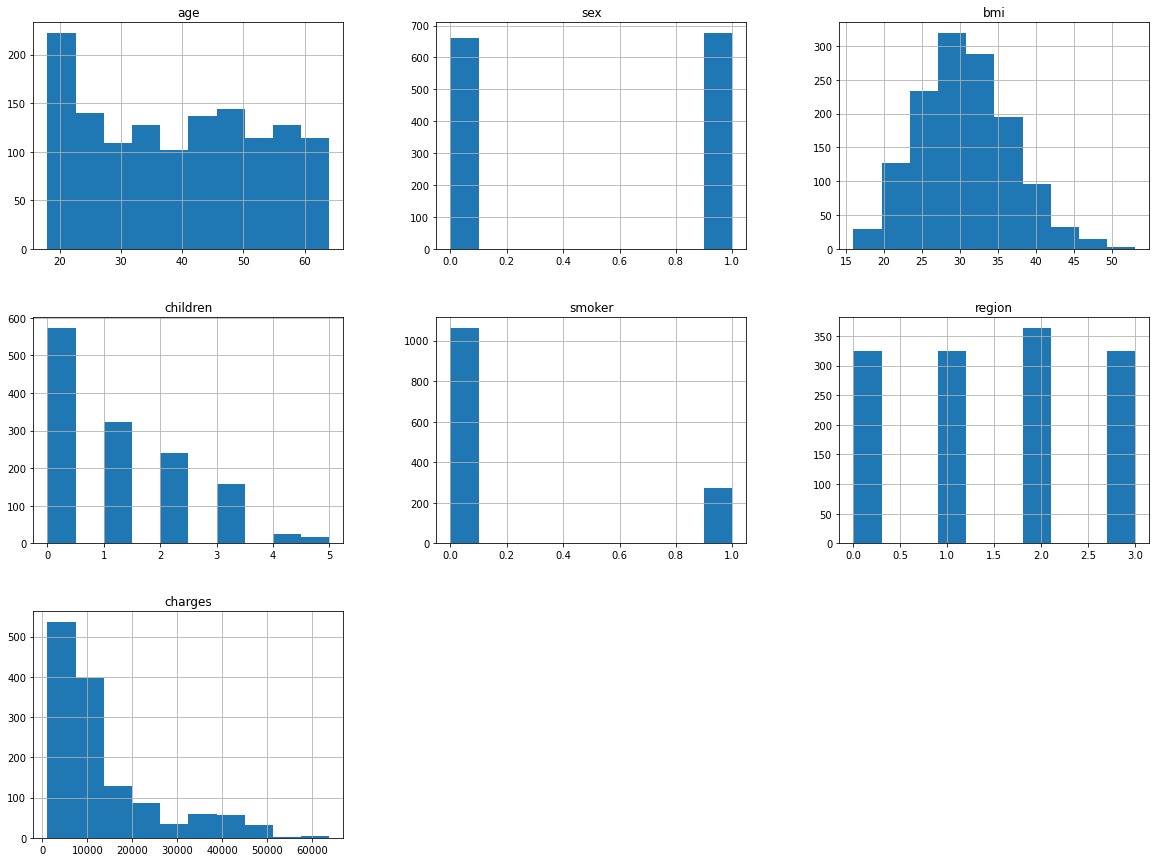

In [15]:
X = df.drop('charges',axis=1)
y = df['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
import seaborn as sns 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

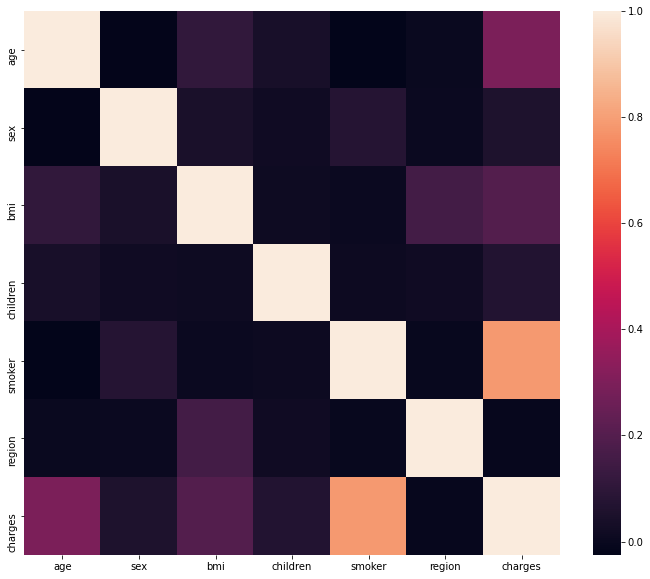

In [16]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

In [18]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 4.2 MB/s eta 0:00:01


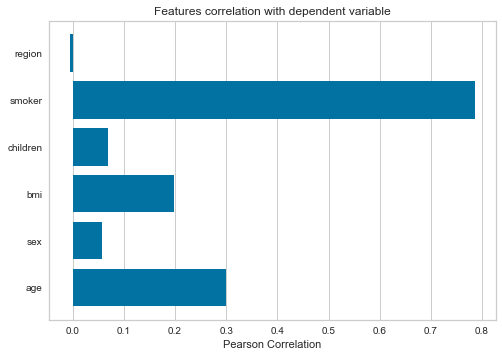

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [19]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(X.columns)
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(X, y)

visualizer.poof()

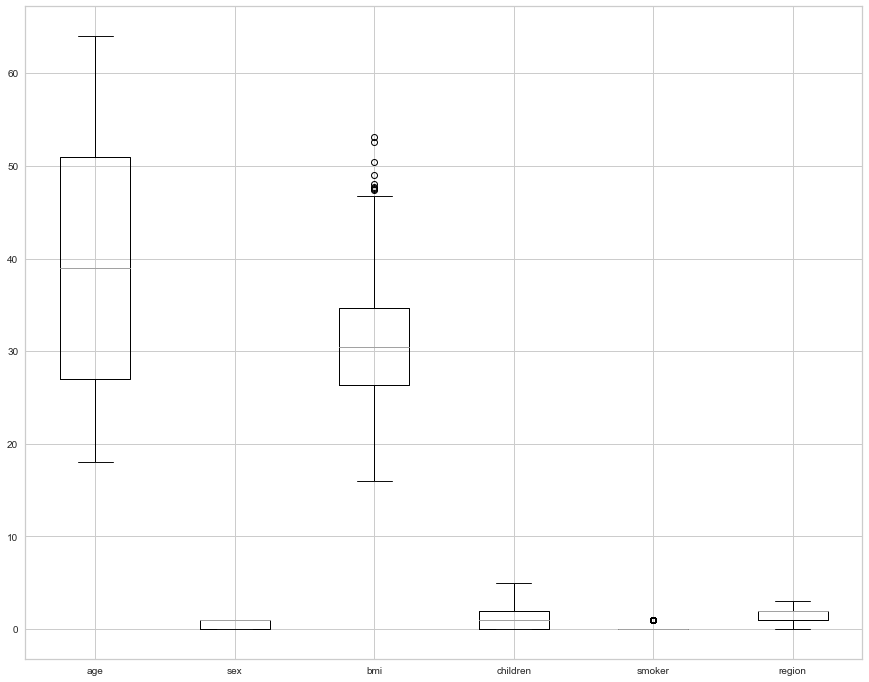

In [20]:
boxplot = X.boxplot(figsize=(15, 12))

In [21]:
df.loc[df['bmi'] > 45]  

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
292,25,1,45.54,2,1,2,42112.23560
401,47,1,47.52,1,0,2,8083.91980
438,52,0,46.75,5,0,2,12592.53450
454,32,1,46.53,2,0,2,4686.38870
543,54,0,47.41,0,1,2,63770.42801
547,54,0,46.70,2,0,3,11538.42100
549,43,0,46.20,0,1,2,45863.20500
582,39,1,45.43,2,0,2,6356.27070


In [23]:
mean_bmi = X['bmi'].mean()
mean_bmi

30.663396860986538

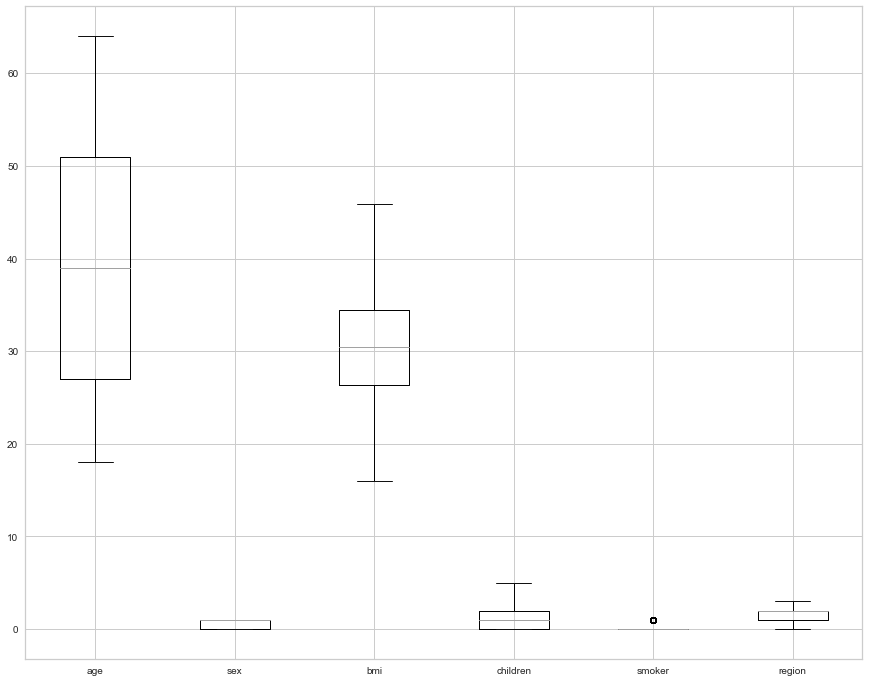

In [24]:
for index, row in X.iterrows():
    
    if row['bmi']  >46:
        X.at[index, 'bmi'] = mean_bmi
boxplot = X.boxplot(figsize=(15, 12))

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1 = make_pipeline(StandardScaler(), LinearRegression())
model_1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [26]:
model_1.score(X_test,y_test)

0.7602640802497018

In [27]:
from sklearn.metrics import mean_absolute_error
y_pred = model_1.predict(X_test)
mean_absolute_error(y_test, y_pred)

4204.415654724193

In [28]:
from sklearn.linear_model import Lasso
model_2 = make_pipeline(StandardScaler(), Lasso())
model_2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [29]:
model_2.score(X_test,y_test)

0.7602651904580856

In [30]:
y_pred = model_2.predict(X_test)
mean_absolute_error(y_test, y_pred)

4204.260373504684

In [31]:
from sklearn.ensemble import RandomForestRegressor
model_3 =make_pipeline(StandardScaler(), RandomForestRegressor()) 
model_3.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [32]:
model_3.score(X_test,y_test)

0.8440604207130764

In [33]:
y_pred = model_3.predict(X_test)
mean_absolute_error(y_test, y_pred)

2622.8957512230777